In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id = 'test-281700'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://spotify_asr_dataset/


In [ ]:
bucket_name = 'spotify_asr_dataset'
#download dataset
!gsutil -m cp -r gs://{bucket_name}/dataset.csv /content/

Copying gs://spotify_asr_dataset/dataset.csv...
\ [1/1 files][  2.9 GiB/  2.9 GiB] 100% Done  51.3 MiB/s ETA 00:00:00           
Operation completed over 1 objects/2.9 GiB.                                      


In [ ]:
import pandas as pd
dataset = pd.read_csv('dataset.csv')
dataset.head(5)

,episode_id,transcript
0,spotify:episode:399kdfMnjw0KYANZU7CQJ0,It's the mother back a podcast. Well that was...
1,spotify:episode:49wcMBeJfaaL6KFFdsWvac,If you haven't heard about anchor is the easi...
2,spotify:episode:0JOymLFsRdeBVZbEA72ayj,Hello and welcome to the podcast the first ev...
3,spotify:episode:7sHyO8wLeEd1LuxfS8AIls,"Hey, hey. Hey. Hey. Hey, this is your girl Je..."
4,spotify:episode:1WosITIkpJemzZaPh8zAVb,This is the planetary potential podcast for t...


In [ ]:
!gsutil -m cp -r gs://{bucket_name}/metadata.tsv /content/
podcasts_metadata = pd.read_csv('metadata.tsv', sep='\t')
podcasts_metadata.head(5)

Copying gs://spotify_asr_dataset/metadata.tsv...
- [1/1 files][112.2 MiB/112.2 MiB] 100% Done                                    
Operation completed over 1 objects/112.2 MiB.                                    


,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
4,spotify:show:7w3h3umpH74veEJcbE6xf4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],https://www.fuckboisoflit.com/episodes?format=rss,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG


In [ ]:
full_dataset = pd.merge(left=podcasts_metadata, right=dataset, how='left', left_on='episode_uri', right_on='episode_id')
del full_dataset['episode_uri']
full_dataset.head(5)

,show_uri,show_name,show_description,publisher,language,rss_link,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix,episode_id,transcript
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj,spotify:episode:000A9sRBYdVh66csG2qEdj,Hello. Hello. Hello everyone. This is Katie a...
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA,spotify:episode:000HP8n3hNIfglT2wSI2cA,There were two more murders 15 miles away arr...
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Welcome to inside the 18. Today's episode is ...
3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm,spotify:episode:001i89SvIQgDuuyC53hfBm,Hey cheese fans before we get started. I want...
4,spotify:show:7w3h3umpH74veEJcbE6xf4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],https://www.fuckboisoflit.com/episodes?format=rss,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"Sorry to interrupt the show, but I do have to..."


In [ ]:
#number of unique shows
podcasts_metadata.groupby(by=['show_uri']).count()

,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
show_uri,,,,,,,,,,,
spotify:show:002B8PbILr169CdsS9ySTH,1,1,1,1,1,1,1,1,1,1,1
spotify:show:005ZAjJK1wlD4E2YxeibBb,1,1,1,1,1,1,1,1,1,1,1
spotify:show:007ISDom3HctggVaUjno6B,1,1,1,1,1,1,1,1,1,1,1
spotify:show:00BUDdSn801kmcWw50Us8S,1,1,1,1,1,1,1,1,1,1,1
spotify:show:00BnuPjwbyMPxVIM7NimQj,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
spotify:show:7zuxJZkpFwNAQN8GN6Hyda,23,23,23,23,23,23,23,23,23,23,23
spotify:show:7zvzi6dk9lEBDxlfpoeMof,2,2,2,2,2,2,2,2,2,2,2
spotify:show:7zzZuHQrVExZaZpdN1pRqz,5,5,5,5,5,5,5,5,5,5,5


In [ ]:
#max number of episodes a show has
podcasts_metadata.groupby(by=['show_uri']).count().max()

show_name                  5.733566
show_description           5.733457
publisher                  5.733566
language                   5.733566
rss_link                   5.733566
episode_uri                5.733566
episode_name               5.733566
episode_description        5.722410
duration                   5.733566
show_filename_prefix       5.733566
episode_filename_prefix    5.733566
dtype: float64

In [ ]:
#mean number of episodes a show has
podcasts_metadata.groupby(by=['show_uri']).count().mean()

show_name                  5.733566
show_description           5.733457
publisher                  5.733566
language                   5.733566
rss_link                   5.733566
episode_uri                5.733566
episode_name               5.733566
episode_description        5.722410
duration                   5.733566
show_filename_prefix       5.733566
episode_filename_prefix    5.733566
dtype: float64

In [ ]:
podcasts_metadata.groupby(by=['show_uri']).count().median()

show_name                  2.0
show_description           2.0
publisher                  2.0
language                   2.0
rss_link                   2.0
episode_uri                2.0
episode_name               2.0
episode_description        2.0
duration                   2.0
show_filename_prefix       2.0
episode_filename_prefix    2.0
dtype: float64

In [ ]:
counts = podcasts_metadata.groupby(by=['show_uri']).size().reset_index(name='count')
counts.head(2)

,show_uri,count
0,spotify:show:002B8PbILr169CdsS9ySTH,1
1,spotify:show:005ZAjJK1wlD4E2YxeibBb,1


Text(0.5, 0, 'Episode Counts')

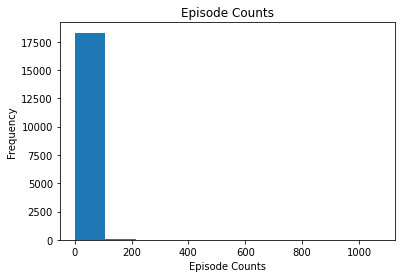

In [ ]:
import matplotlib.pyplot as plt
counts['count'].plot.hist(title='Episode Counts')
plt.xlabel('Episode Counts')

In [ ]:
duration = podcasts_metadata.groupby(by=['duration']).size().reset_index(name='count')
duration.head(2)

,duration,count
0,0.175317,1
1,0.180733,1


Text(0.5, 0, 'Duration (mins)')

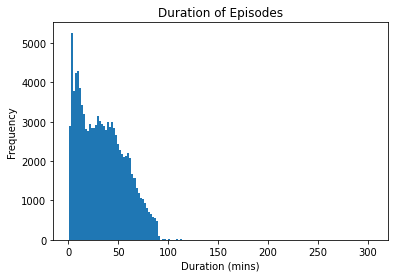

In [ ]:
import matplotlib.pyplot as plt
podcasts_metadata['duration'].plot.hist(bins=150, title='Duration of Episodes')
plt.xlabel('Duration (mins)')